In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.rename(columns=
          {'Pregnancies': 'preg','glu':'Glucose','BloodPressure':'BP','SkinThickness':'ST','DiabetesPedigreeFunction':'DPF'},inplace=True)

In [6]:
df.head()

,preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking for zero values

In [7]:
df.iloc[:,1:-1].isin([0]).sum()

Glucose      5
BP          35
ST         227
Insulin    374
BMI         11
DPF          0
Age          0
dtype: int64

In [8]:
df.iloc[:,1:-3].describe()

,Glucose,BP,ST,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [9]:
for col in ['Glucose','BP','ST','Insulin','BMI']:
    df[col]=df[col].replace(0,df[col].median())

In [10]:
df.iloc[:,1:-3].isin([0]).sum()

Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
dtype: int64

### checking for null values

In [11]:
df.isnull().sum()

preg       0
Glucose    0
BP         0
ST         0
Insulin    0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64

### Checking if data is imbalanced

In [12]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Feature selection

In [13]:
df.corr()

,preg,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
preg,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BP,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
ST,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DPF,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


In [14]:
df1=df.iloc[:,[0,1,5,7]]
df1=pd.concat([df1,df['Outcome']],axis=1)
df1

,preg,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
...,...,...,...,...,...
763,10,101,32.9,63,0
764,2,122,36.8,27,0
765,5,121,26.2,30,0
766,1,126,30.1,47,1


### Feature scaling

In [15]:
x1=df1.iloc[:,0:4]
y1=df1.Outcome

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=.25)

In [17]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [18]:
sc_train=std.fit_transform(xtrain)
sc_test=std.transform(xtest)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=.1)
log.fit(sc_train,ytrain)

LogisticRegression(C=0.1)

In [20]:
p=log.predict(sc_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(ytest,p)
cm1

array([[112,  13],
       [ 25,  42]], dtype=int64)

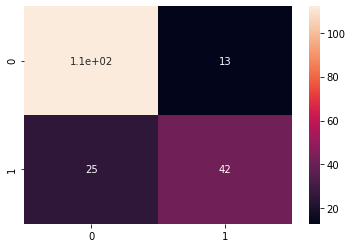

In [22]:
sn.heatmap(cm1,annot=True)
plt.show()

In [23]:
from sklearn.metrics import f1_score
print("F1 score for training data:",f1_score(ytrain,log.predict(sc_train)))
print("F1 score for test data:",f1_score(ytest,p))

F1 score for training data: 0.6136363636363636
F1 score for test data: 0.6885245901639345


In [24]:
print("Accuracy Score for test data:",log.score(sc_test,ytest))

Accuracy Score for test data: 0.8020833333333334


### SVM

In [169]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',gamma=.89)

In [170]:
svm.fit(sc_train,ytrain)

SVC(gamma=0.89)

In [171]:
pred=svm.predict(sc_test)

In [172]:
print("Training F1 score:",f1_score(ytrain,svm.predict(sc_train)))
print("Testing F1 score:",f1_score(ytest,pred))

Training F1 score: 0.7806122448979592
Testing F1 score: 0.7040000000000001


In [173]:
cm2=confusion_matrix(ytest,pred)
cm2

array([[111,  14],
       [ 23,  44]], dtype=int64)

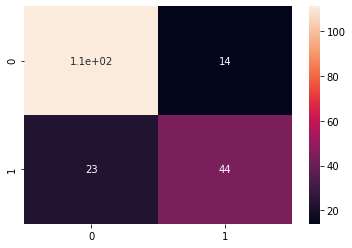

In [174]:
sn.heatmap(cm2,annot=True)
plt.show()

In [63]:
print("Accuracy Score for test data:",svm.score(sc_test,ytest))

Accuracy Score for test data: 0.7916666666666666
